In [1]:
### Create a Tensor in PyTorch

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

/Users/sampathweb/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [13]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [41]:
# Scalar
torch.ones(1)


 1
[torch.FloatTensor of size 1]

In [42]:
# Vector
torch.Tensor([1, 2, 3])


 1
 2
 3
[torch.FloatTensor of size 3]

In [43]:
# Matrix
X = torch.Tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
X


 1  2  3
 4  5  6
 7  8  9
[torch.FloatTensor of size 3x3]

In [44]:
# Convert Torch Tensor to numpy Array
X.numpy()

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.]], dtype=float32)

In [56]:
# Convert numpy arrays to Torch Tensors
arr = np.random.randn(5)
x = torch.from_numpy(arr)
x


-0.3488
 1.0517
 1.3775
-0.3063
 1.2041
[torch.DoubleTensor of size 5]

In [57]:
# Indexing similar to Python and numpy
x[:-2]


-0.3488
 1.0517
 1.3775
[torch.DoubleTensor of size 3]

In [5]:
### Variables

In [6]:
from torch.autograd import Variable

In [7]:
X = torch.ones(1) * 10
X = Variable(X, requires_grad=True)

# Y = 5 * X
# dy / dx = 5
y = (5 * X).sum()

# Back propagate to compute gradients of all variables w.r.t. y
y.backward()

# Get the Gradient
X.grad

Variable containing:
 5
[torch.FloatTensor of size 1]

In [8]:
X = Variable(d)

In [19]:
n = 1000

x = np.random.randn(n, 1)
y = 10 + (3 * x) + np.random.randn(n, 1)

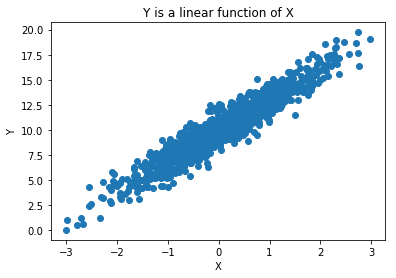

In [3]:
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Y is a linear function of X");

In [4]:
## Keras Linear Regression

In [5]:
import keras

Using TensorFlow backend.


In [6]:
## Define the Model
model = keras.models.Sequential([
    keras.layers.Dense(1, input_shape=[1], name="linear_layer")
])

In [7]:
# Bias and Weights are the two Parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
linear_layer (Dense)         (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
## Compile and Fit the Model
nb_epochs = 50
optmizier = keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=optmizier, loss="mse", metrics=["mse"])
hist = model.fit(x, y, epochs=nb_epochs, verbose=False)

In [9]:
y_est = model.predict(x)

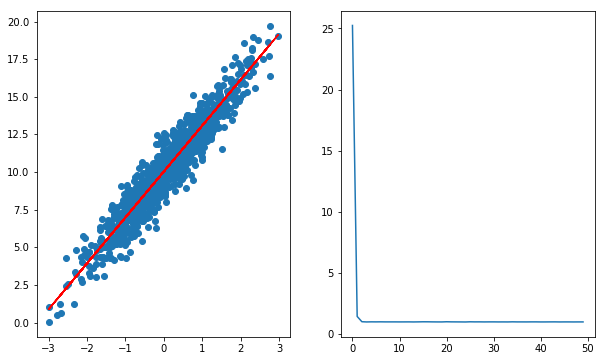

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].scatter(x, y)
ax[0].plot(x, y_est, "r-")
ax[1].plot(np.arange(nb_epochs), hist.history["loss"]);

### PyTorch Linear Regression

In [11]:
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=1, bias=True)
)
print(model)

Sequential (
  (0): Linear (1 -> 1)
)


In [12]:
model[0].weight

Parameter containing:
 0.5693
[torch.FloatTensor of size 1x1]

In [13]:
## Run the Model
optim = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

inputs = torch.autograd.Variable(torch.Tensor(x), requires_grad=False)
targets = torch.autograd.Variable(torch.Tensor(y), requires_grad=False)
losses = []
for epoch in range(nb_epochs):
    
    # Run Forward Propogation
    outputs = model(inputs)
    
    # Calculate the Loss
    loss_val = ((targets - outputs) ** 2).mean()/2
    losses.append(loss_val.data[0])
    
    # Zero out the gradient
    optim.zero_grad()
    
    # Do Backward Prop on loss w.r.t. paramaters
    loss_val.backward()
    
    # Update the gradients
    optim.step()

In [14]:
y_est = model(inputs)

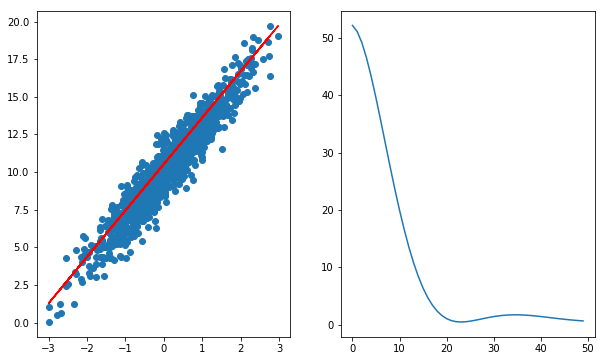

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].scatter(x, y)
ax[0].plot(x, y_est.data.numpy(), "r-")
ax[1].plot(np.arange(nb_epochs), losses);

### TensorFlow

In [16]:
import tensorflow as tf

In [43]:
## Define the Graph
g = tf.Graph()

with g.as_default():
    inputs = tf.placeholder(tf.float32, shape=[None, 1], name="inputs")
    targets = tf.placeholder(tf.float32, shape=[None, 1], name="targets")
    
    outputs = tf.layers.dense(inputs, 1)
    loss = tf.reduce_mean((targets - outputs) ** 2)
    train_op = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

In [44]:
## Run the graph
nb_epochs = 200
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    losses = []
    for epoch in range(nb_epochs):
        _, loss_val = sess.run([train_op, loss], feed_dict={inputs: x, targets: y})
        losses.append(loss_val)
        
    y_est = sess.run(outputs, feed_dict={inputs: x, targets: y})

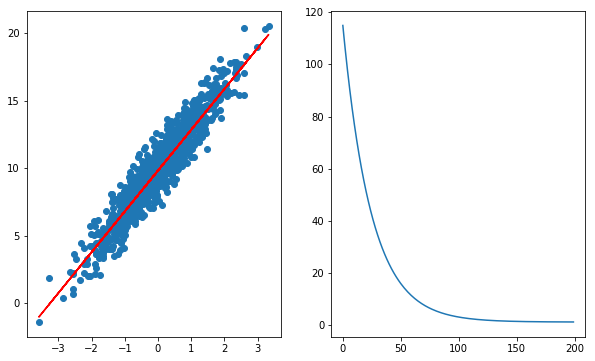

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].scatter(x, y)
ax[0].plot(x, y_est, "r-")
ax[1].plot(np.arange(nb_epochs), losses);

In [46]:
## Classification Problems

In [1]:
## Logistic Regression

In [24]:
from IPython.display import Image

In [16]:
IPython.display.display_jpeg("https://michelleful.github.io/PyCon2017/images/binary_classification.png")

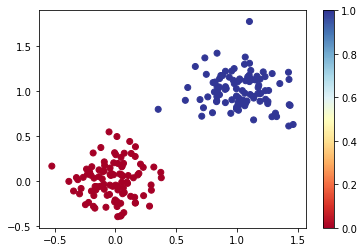

In [125]:
centers = np.array([[0, 0]] * 100 + [[1, 1]] * 100)
np.random.seed(42)
data = np.random.normal(0, 0.2, (200, 2)) + centers
y = np.array([[0]] * 100 + [[1]] * 100)

plt.scatter(data[:,0], data[:,1], c=labels, cmap=plt.cm.RdYlBu)
plt.colorbar();

### Logistic Regression - Model

* Take a weighted sum of the features and add a bias term to get the logit.
* Convert the logit to a probability via the logistic-sigmoid function.

** Sigmoid Function **

<img src="images/sigmoid.png",width=500>

$$f(x) = \frac{e^x}{1+e^x}$$

### Logistic Regression - Keras

** Define the Model **

In [88]:
model = keras.models.Sequential([
    keras.layers.Dense(1, input_shape=[2], name="Logit"),
    keras.layers.Activation("sigmoid", name="Sigmoid")
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Logit (Dense)                (None, 1)                 3         
_________________________________________________________________
Sigmoid (Activation)         (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


** Run the Model **

In [89]:
model.compile("adam", loss="binary_crossentropy")
hist = model.fit(data, y, epochs=300, verbose=0)

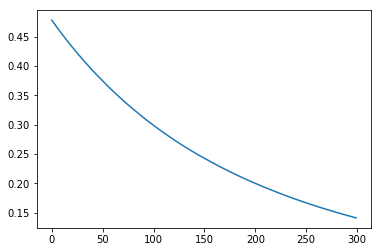

In [90]:
plt.plot(hist.history["loss"])

In [114]:
for layer in model.layers:
    if layer.name == "Logit":
        (w0, w1), bias = layer.get_weights() # list of numpy arrays
        w0, w1, bias = w0[0], w1[0], bias[0]
        print("w0: {:.2f}, w1: {:.2f}, bias: {:.2f}".format(w0, w1, bias))

w0: 2.70, w1: 1.46, bias: -1.56


In [115]:
bias

-1.5601274

In [84]:
w0, w1, bias

(array([ 1.31929326], dtype=float32),
 array([ 1.94551957], dtype=float32),
 array([-1.00816405], dtype=float32))

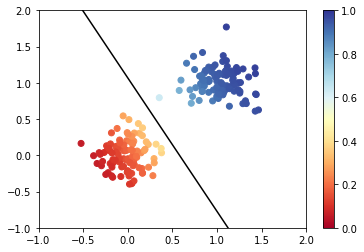

In [116]:
pred_labels = model.predict(data)

plt.scatter(data[:,0], data[:,1], c=pred_labels, cmap=plt.cm.RdYlBu,
            vmin=0.0, vmax=1)
xx = np.linspace(-1, 2, 100)

yy = -w0 / w1 * xx - bias / w1
plt.plot(xx, yy, 'k')
plt.axis((-1,2,-1,2))
plt.colorbar();

## TensorFlow

In [137]:
g = tf.Graph()

with g.as_default():
    x_data = tf.placeholder(tf.float32, [None, 2], name="features")
    y_label = tf.placeholder(tf.float32, [None, 1], name="labels")

    W = tf.Variable(tf.truncated_normal([2, 1]), name="weights")
    b = tf.Variable(tf.zeros([1]), name="biases")
    logits = tf.matmul(x_data, W) + b

    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, 
                                                                  labels=y_label))
    train_op = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

    predicted = tf.cast(tf.nn.sigmoid(logits) > 0.5, np.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_label), np.float32))

In [140]:
nb_epochs = 200
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(nb_epochs):
        sess.run(train_op, feed_dict={x_data: data, y_label: y})

    pred_labels = sess.run(tf.nn.sigmoid(logits), feed_dict={x_data: data, y_label: y})
    ww, bb = sess.run([W, b])

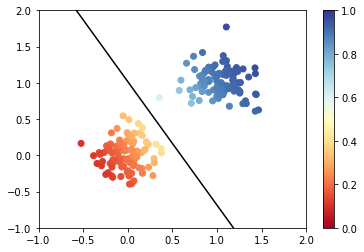

In [142]:
plt.scatter(data[:,0], data[:,1], c=pred_labels, cmap=plt.cm.RdYlBu,
            vmin=0.0, vmax=1.0)
xx = np.linspace(-1, 2, 100)
yy = -ww[0] / ww[1] * xx - bb / ww[1]
plt.plot(xx, yy, 'k')
plt.axis((-1,2,-1,2))
plt.colorbar();

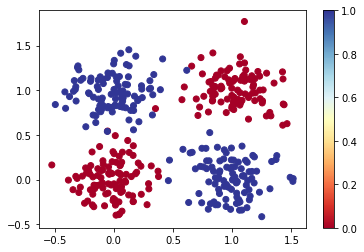

In [19]:
centers = np.array([[0, 0]] * 100 + [[1, 1]] * 100
                   + [[0, 1]] * 100 + [[1, 0]] * 100)
np.random.seed(42)
data = np.random.normal(0, 0.2, (400, 2)) + centers
labels = np.array([[0]] * 200 + [[1]] * 200)

plt.scatter(data[:,0], data[:,1], c=labels, cmap=plt.cm.RdYlBu)
plt.colorbar();

In [77]:
## Simple function of X
X = Variable(torch.rand(10, 1))
X

Variable containing:
 0.6577
 0.2442
 0.9040
 0.7817
 0.2349
 0.5712
 0.6392
 0.0651
 0.0490
 0.3022
[torch.FloatTensor of size 10x1]

In [10]:
y = Variable(5 * X.data + torch.rand(10))

In [11]:
y

Variable containing:
 3.6616
 1.2762
 4.0995
 4.7824
 3.5224
 4.8635
 2.3666
 4.5147
 0.6733
 4.6887
[torch.FloatTensor of size 10x1]

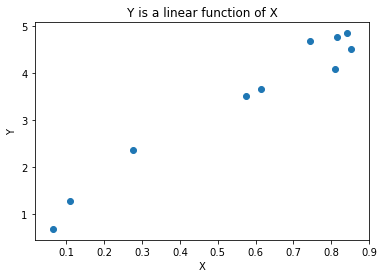

In [12]:
plt.scatter(X.data.numpy(), y.data.numpy())
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Y is a linear function of X");

In [13]:
torch.mm(X, w)

NameError: name 'w' is not defined

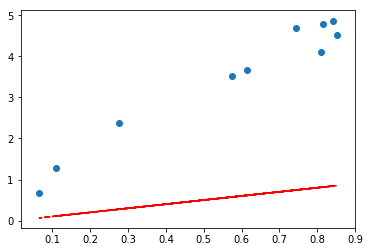

In [14]:
w = Variable(torch.ones(1, 1), requires_grad=True)

def plot_torch_linear_xy(X, y, y_est=None):
    plt.scatter(X.data.numpy(), y.data.numpy())
    if y_est is not None:
        plt.plot(X.data.numpy(), y_est.data.numpy(), 'r--')
    # y_est = w
    

y_est = torch.mm(X, w)
plot_torch_linear_xy(X, y, y_est)

In [15]:
w_delta

NameError: name 'w_delta' is not defined

In [16]:
torch.z

AttributeError: module 'torch' has no attribute 'z'

In [23]:
# dy/dw = val of x

lr = 0.01

y_est = torch.mm(X, w)

loss = ((y - y_est) ** 2).mean()

# loss.grad.zero()
# Backpropogate to compute gradients w.r.t. loss
loss.backward(retain_variables=True)

# Update the parameters
w = w - lr * w.grad
print(w.grad)

plot_torch_linear_xy(X, y, y_est)

RuntimeError: calling backward on a volatile variable

## The XOR problem

Research into artificial neurons dates to the late 40s, but it was not until 1969 that Martin Minsky and Seymour Papert pointed out that basic neurons were unable to reproduce the **exclusive-or** (XOR) function.  This boolean function of two boolean variables returns true if exactly one of its inputs is true:

$$ \mathrm{XOR}(0, 0) = \mathrm{XOR}(1, 1) = 0 \ \ \ \ \ \ \mathrm{XOR}(0, 1) = \mathrm{XOR}(1, 0) = 1 $$

Below, we create a related two-class classification problem, with one class clustered about (0, 0) and (1, 1), and the other about (0, 1) and (1, 0).  It would be quite easy to draw a boundary separating the two classes by hand.